In [1]:
import numpy as np
from pyDOE import *
import random
import matplotlib.pyplot as plt

In [2]:
# Sub-Algorithm A
def SubA_algo(x):
    space=np.zeros((18,102))
    space[1:17,1:101] = x
    space[0,:]=1
    space[:,0]=1
    space[:,-1]=1
    space[-1,:]=0    
    m=np.shape(space)[0]
    n=np.shape(space)[1]
    x00 = space[0:m-2,0:n-2]
    x01 = space[0:m-2,1:n-1]
    x02 = space[0:m-2,2:n  ]
    x03 = space[1:m-1,2:n  ]
    x04 = space[2:m,  2:n  ]
    x05 = space[2:m,  1:n-1]
    x06 = space[2:m  ,0:n-2]
    x07 = space[1:m-1,0:n-2]

    xall_sum = np.sum([x00,x01,x02,x03,x04,x05,x06,x07], axis = 0)
    x1357_sum = np.sum([x01,x03,x05,x07], axis = 0)
    x0246_sum = np.sum([x00,x02,x04,x06], axis = 0)
    cond1 = x00*x01+x01*x02+x02*x03+x03*x04+x04*x05+x05*x06+x06*x07+x07*x00
    cond2 = x00*x01*x02+x02*x03*x04+x04*x05*x06+x06*x07*x00

    ip1, jp1 = np.where((x==0) & (xall_sum == 2) & (cond1==1))
    ip2, jp2 = np.where((x==0) & (xall_sum == 3) & (cond2==1))
    ip3, jp3 = np.where((x==0) & (x1357_sum==1) & (x0246_sum==0))

    ip = np.concatenate((ip1+1,ip2+1,ip3+1)).tolist()
    jp = np.concatenate((jp1+1,jp2+1,jp3+1)).tolist()
    return ip, jp

In [3]:
# Sub-Algorithm B
def SubB_algo(ip,jp,design_ratio,x,t):
    space=np.zeros((18,102))
    space[1:17,1:101] = x
    space[0,:]=1
    space[:,0]=1
    space[:,-1]=1
    space[-1,:]=0    
    ind = np.int32(np.ceil(len(ip)*design_ratio))-1
    i_s=ip[ind]
    j_s=jp[ind]
    if space[i_s-1,j_s] == 1: 
        iw,jw = np.where(space[i_s:,j_s-1:j_s+2]==1)
        c_list = np.arange(i_s+t,np.min(np.concatenate((np.array([len(space[:,0])]), iw+i_s),axis=0)))
        if len(c_list) != 0:
            p_l = np.random.choice(c_list)         
            space[i_s:p_l,j_s]=1
    elif space[i_s+1,j_s] == 1: 
        iw,jw = np.where(space[0:i_s+1,j_s-1:j_s+2]==1)
        c_list = np.arange(np.max(np.concatenate((np.array([-1]), iw),axis=0)+2),i_s-t+1)
        if len(c_list) != 0:
            p_l = np.random.choice(c_list)      
            space[p_l:i_s+1,j_s]=1
    elif space[i_s,j_s-1] == 1: 
        iw,jw = np.where(space[i_s-1:i_s+2,j_s:]==1)
        c_list = np.arange(j_s+t,np.min(np.concatenate((np.array([len(space[0,:])]), jw+j_s),axis=0)))
        if len(c_list) != 0:
            p_l = np.random.choice(c_list)        
            space[i_s,j_s:p_l]=1
    elif space[i_s,j_s+1] == 1:
        iw,jw = np.where(space[i_s-1:i_s+2,0:j_s+1]==1)
        c_list = np.arange(np.max(np.concatenate((np.array([-1]), jw),axis=0)+2),j_s-t+1)
        if len(c_list) != 0:
            p_l = np.random.choice(c_list)     
            space[i_s,p_l:j_s+1]=1
    return space[1:17,1:101]

In [4]:
# Define conditions
B = 3  # The number of paritions
NUM = 16  # The number of partition layouts to generate 

In [5]:
# PLG Algorithm 
X_set = np.empty(shape = [0,16,100])
for j in np.arange(NUM):
    X=np.zeros((16,100))
    design_ratio = lhs(B, 1)
    for i in np.arange(B):
        ip,jp = SubA_algo(X)
        X_c = np.copy(X)
        while np.int32(np.sum(X_c)) == np.int32(np.sum(X)):
            X = SubB_algo(ip,jp,design_ratio[0,i],X,0)
    X_set = np.concatenate((X_set, X.reshape(1,16,100)), axis=0)    
X_set = X_set.reshape(NUM,1600)

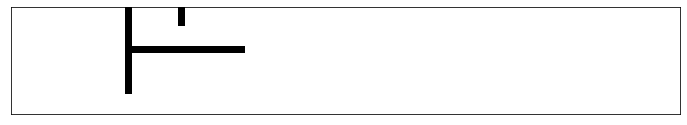

In [6]:
data_index = random.choice(list(range(NUM)))

plt.figure(figsize=(12,2))
ax=plt.subplot(1,1,1)
plt.imshow(np.abs(X_set[data_index,:].reshape(16,100)-1),'gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()